# Logistic Regression

Name: Parshva Bhadra<br>
Roll Number: 2020101001

### Dataset

Use the code below to load the Dataset


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

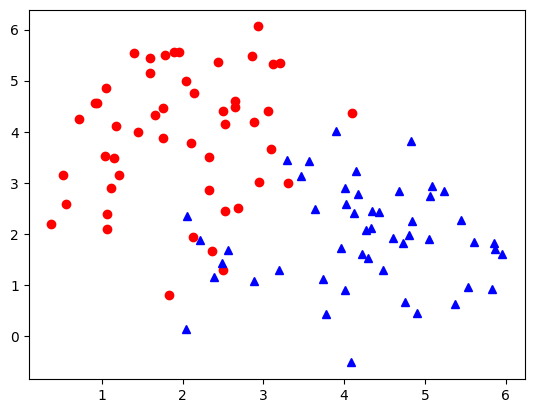

In [5]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

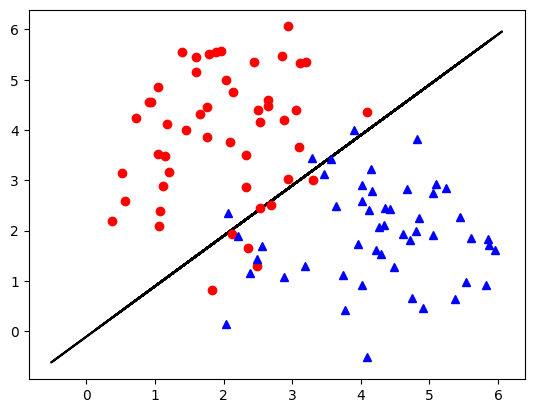

In [21]:
from inspect import BoundArguments


class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def print_weights(self):
        print("Weights: ", self.weights)
        print("Bias: ", self.bias)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Train the model
regressor = LogisticRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X, y)

# Print weights and bias
# regressor.print_weights()

# Plot the decision boundary
decision_boundary = -(regressor.weights[0] * X + regressor.bias) / regressor.weights[1]
plt.plot(X, decision_boundary, color='black', label='decision boundary')

# plot the decision boundary
# def visualize_boundary(X, y, model):
#     x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
#     y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
#     xx, yy = np.meshgrid(x_span, y_span)
#     grid = np.c_[xx.ravel(), yy.ravel()]
#     pred_func = model.predict(grid)
#     z = np.array(pred_func).reshape(xx.shape)
#     plt.contourf(xx, yy, z)

# visualize_boundary(X, y, regressor)
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


### Questions

1) Explain the approach of Logistic Regression.<br>
2) What is the loss function used?<br>
3) Explain if we can use Mean Square Error(MSE) as Loss function.

### Answers

1)  Logistic Regression is a classification algorithm which is used to classify the data into two or more classes. It is a supervised learning algorithm which uses the sigmoid function to classify the data. The sigmoid function is a function which maps any real value between 0 and 1. It is a non-linear function which is used to classify the data into two classes. The sigmoid function is given by:
$$\sigma(z) = \frac{1}{1+e^{-z}}$$ 
2)  The loss function used in Logistic Regression is the cross-entropy loss function. The cross-entropy loss function is given by:
$$L = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)})$$
3)  No, we cannot use Mean Square Error(MSE) as Loss function. The reason is that the MSE loss function is not convex for logistic regression. The MSE loss function is given by:
$$L = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})^2$$
